# Project: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

#### Questions: 

        ● Popular movies ?
        ● Movie production trends varied over the years ?
        ● What are the top 20 highest revenues  movies ? 
        ● top 20 most expensive movies ?
        ● the profit of the each movie ?
       


#### General 

In [1]:
#  import statements for all of the packages 
#  plan to use (pandas / numpy / matplotlib)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

#### The Data: 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

        ● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
        ● There are some odd characters in the ‘cast’ column.
        ● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation overtime.
        

        ● gathering data 
        ● assessing data
        ● cleaning data



####   1.  Gathering data
      That would be done by downloading the data to the jupyter Notebook

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("tmdb-movies.csv")

#### 2. Assessing data

In [3]:
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# i want to know the shape of my data (raw,column)
df.shape

(10866, 21)

In [5]:
# now lets look to the type of the data and the missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Notes 
    there are a lot of important columns ex: 
            * popularity
            * budget
            * revenue
            * director
            * genres
            * runtime
            * vote_count
            * release_year
     i'm going to focus on these columns 

#### 3. Cleaning data 
            After discussing the structure of the data and any problems that need to be
            cleaned, perform those cleaning steps in the second part of this section.

In [6]:
# dropping unwanted columns
df = df.drop(columns=['id','imdb_id','homepage','tagline','keywords','overview','vote_average','budget_adj','revenue_adj'],axis=1)

In [7]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015


In [8]:
# the desired columns after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
release_year            10866 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 1018.8+ KB


In [9]:
# Removing 0's from budget and the revenue columns
df['budget'] =df['budget'].replace(0, np.NAN)

In [10]:
# Removing 0's from the revenue columns
df['revenue'] =df['revenue'].replace(0, np.NAN)

In [11]:
# Removing 0's from runtime columns
df['revenue'] =df['revenue'].replace(0, np.NAN)

In [12]:
# remove any null value :)
df.dropna(inplace=True)

In [13]:
#lets see what happen here after removing 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 12 columns):
popularity              3806 non-null float64
budget                  3806 non-null float64
revenue                 3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null int64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
vote_count              3806 non-null int64
release_year            3806 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 386.5+ KB


    Note :
        the data have been reduced from 10865 to 9773 

In [14]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015


In [15]:
# sum of duplicated data
df.duplicated().sum()

1

In [16]:
# drop any duplicated data 
df.drop_duplicates(inplace=True)

In [17]:
# make sure
df.duplicated().sum()

0

In [18]:
# Changing the release date column into standard date format 
df.release_date = pd.to_datetime(df['release_date'])

In [19]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,2015


     Now we need to answer the questions 

<a id='eda'></a>
## Exploratory Data Analysis

    Compute statistics and create visualizations with the goal of addressing the research questions that i posed in the    Introduction section.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f026ff235c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f026fe33be0>]], dtype=object)

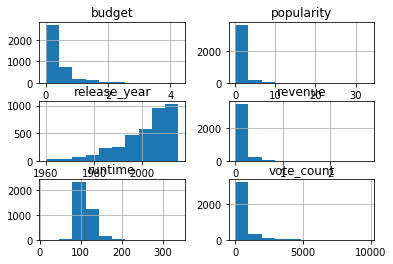

In [20]:
# general look  #### histogram ###
df.hist()

###  Question 1 (Popular movies ?)

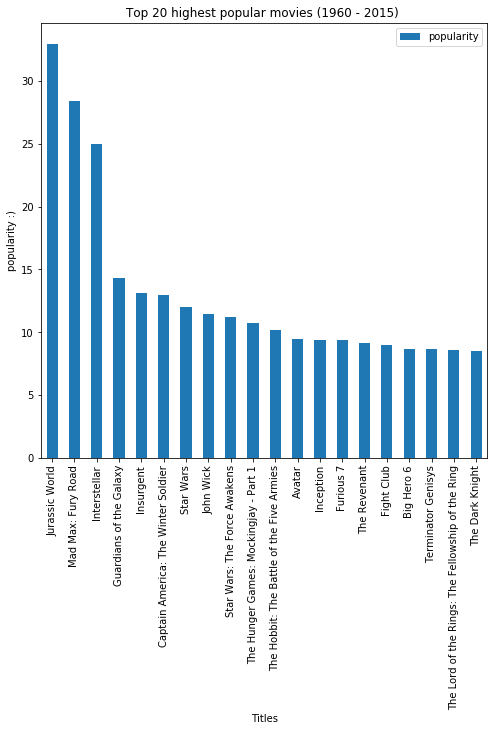

In [21]:
sorted_popularity = df['popularity'].sort_values(ascending=False)[:20]

Popular_movies=pd.DataFrame()
titles=[]
popularity=[]
for i in sorted_popularity.index:
    titles.append(df.loc[i,'original_title'])
    popularity.append(sorted_popularity.loc[i])
Popular_movies['Titles'] = titles
Popular_movies['popularity'] = popularity
Popular_movies.set_index('Titles',inplace=True)
Popular_movies.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 highest popular movies (1960 - 2015) ');
plt.ylabel('popularity :)');

## conclusion  
        jurassic world Movie is the most popular but here is another porblem (the vote count is playing an important role to answer such a question) 

### Question 2 (Movie production trends varied over the years?)

Text(0,0.5,'Number of movies released')

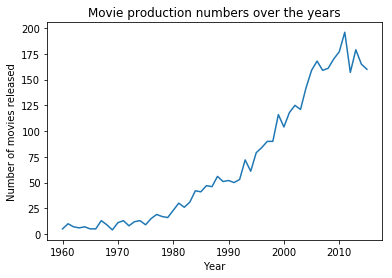

In [22]:
# Number of movies produced each year
movies_p_year= df['release_year'].value_counts().sort_index()
plt.plot(movies_p_year)
plt.title('Movie production numbers over the years')
plt.xlabel('Year')
plt.ylabel('Number of movies released')

## conclusion 
        in the last ten years the number of movies increased signficantly but there is alot of data that is not provide to dig more on why this is happing ? 

###  Question 3 ( What are the top 20 highest grossing movies?)

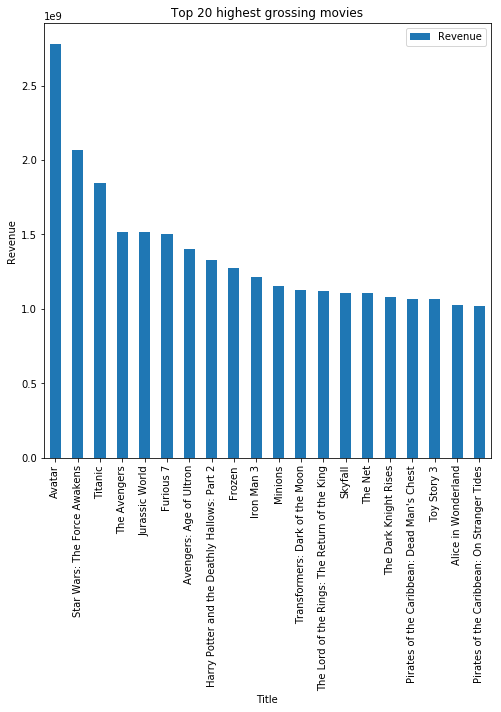

In [23]:
revenue_t = df['revenue'].sort_values(ascending=False)[:20]
top_revenue = pd.DataFrame()
title = []
revenue = []
for i in revenue_t.index:
    title.append(df.loc[i,'original_title'])
    revenue.append(revenue_t.loc[i])
top_revenue['Title']=title
top_revenue["Revenue"]=revenue
top_revenue.set_index('Title',inplace=True)
top_revenue.plot(kind='bar', figsize=(8,8))
plt.title("Top 20 highest grossing movies")
plt.ylabel('Revenue');

## conclusion 
        the highest revenue ever (1960-2015) is avater , the propertise of high revenue movie is dependpend on so many feature such as directors, actors, genres and released dates have a common trend of attraction

 ### Question 4 top 20 most expensive movies?

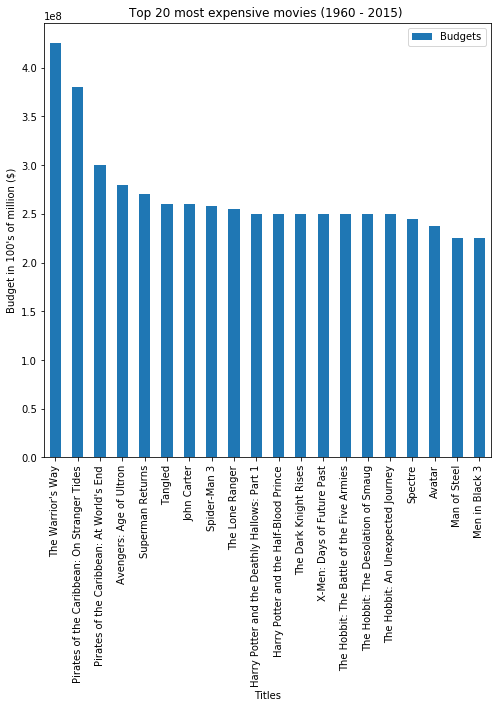

In [24]:
sorted_budget = df['budget'].sort_values(ascending=False)[:20]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,8))
plt.title('Top 20 most expensive movies (1960 - 2015) ');
plt.ylabel('Budget in 100\'s of million ($)');


## conclusion 
        most expensive movie (1960 - 2015) The Warriors way 
        

### Question 4 the profit of the each movie ?

In [25]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit_earned',df['revenue']-df['budget'])

#previewing the changes in the dataset
df.head(2)

,popularity,budget,profit_earned,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,32.985763,150000000.0,1.363529e+09,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,2015
1,28.419936,150000000.0,2.284364e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,2015


In [26]:
import pprint
#defining the ( function )
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
popularity,9.43277,0.25054
budget,2.37e+08,4.25e+08
profit_earned,2.54451e+09,-4.13912e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


## conclusion 
        this table shows the highest profit movie (Avater) and lowest profit movie (The Warrior's Way)

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0